In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [2]:
#train 每人9筆，test 每人1筆
X_train, X_test=[],[]
Y_train, Y_test=[],[]

for i in range (1,41): #No.1 ~ No.40 人
    #每人9張training data set
    for j in range (1,10): 
        img=cv2.imread('data/{}_{}.png'.format(i,j), cv2.IMREAD_GRAYSCALE) #自動讀第i個人的第j張資料，且回讀為灰階資料
        #由training data訓練X(img)，來知道是哪個人(i)
        X_train.append(img)
        Y_train.append(i) #哪個人
    #第十張為test data set
    img=cv2.imread('data/{}_10.png'.format(i), cv2.IMREAD_GRAYSCALE) #自動讀第i個人的第j張資料，且回讀為灰階資料
    X_test.append(img)
    Y_test.append(i) #哪個人

#將所有資料，轉換為numpy

X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

#確認資料維度
#每張都是56x46
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


In [3]:
x=X_train.reshape(len(Y_train),-1) #本來是每筆資料有一個維度56，另一個維度46個特徵。reshape後，相當於每筆資料有56x46=2576個特徵
print(x.shape)

(360, 2576)


## 1. mean face & first four eigenfaces

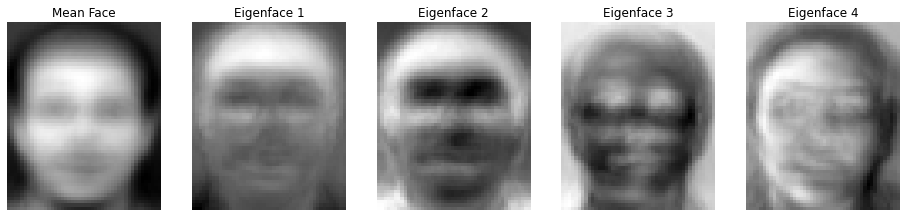

In [5]:
pca=PCA()
pca.fit(X_train.reshape(len(Y_train),-1)) #將X_train的圖片解析度56x46降維成1維，才能與Y_train維度相同後，做訓練

#設定圖片大小
plt.figure(figsize=(16,12))

#總共有5張，第一張要放Mean Face
plt.subplot(1,5,1)
plt.axis('off')
plt.title('Mean Face')
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap='gray') #已reshape至1維的資料，要reshape回來2維 (X_train[0].shape=56x46)

#第二至五張要放Eigenface=>不同維度上的特徵
for i in range (4):
    plt.subplot(1,5,i+2) #i從0開始，但圖要從2開始畫
    plt.axis('off')
    plt.title('Eigenface {}'.format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap='gray') #找前4個出來

plt.show()

In [6]:
pca.components_.shape

(360, 2576)

In [7]:
pca.components_[0]

array([-0.00606884, -0.00622373, -0.00559664, ..., -0.015444  ,
       -0.01280517, -0.01320866])

In [8]:
pca.components_[0].shape #56x46=>1D，[i] 共有360個

(2576,)

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

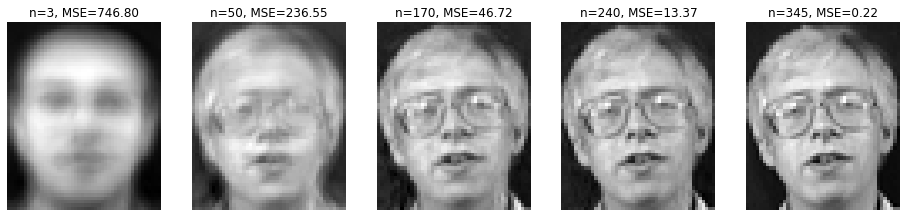

In [19]:
#指定要person2 image1=>2_1.png為底，搭上n=3,50,170,240,345
img=cv2.imread('data/2_1.png',cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a=pca.transform(img)

plt.figure(figsize=(16,12))
n_components=[3,50,170,240,345] #index=0, value=3

for i,n in enumerate (n_components):
    #生成與原始圖大小相同的黑底圖
    face=np.zeros(img.shape)
    #跑不同的components
    for j in range (n): #n=n_components
        #a[0][j]*pca.components_[j] =>reconstruction
        face=face+a[0][j]*pca.components_[j] #以黑圖為底，加上重建的結果。 a=pca.transform(img) =>j越大，表示加入重建量越多
    face=face+pca.mean_ #再加上pca.mean_
    
    #計算轉換後的結果與原始影像的差異MSE
    MSE=np.mean((face-img)**2) #未必n越大，表現越好
    
    plt.subplot(1,5,i+1) #i從0開始，但圖要從2開始畫
    plt.axis('off')
    plt.title('n={}, MSE={:,.2f}'.format(n,MSE))
    plt.imshow(face.reshape(X_train[0].shape),cmap='gray')

In [15]:
a.shape

(1, 360)

In [17]:
img.shape #有reshape

(1, 2576)

In [16]:
a

array([[ 4.53750210e+02,  3.23934588e+02, -6.95711890e+02,
        -2.57000564e+02,  6.65313676e+01,  1.30617340e+02,
         4.71936786e+02,  1.28878433e+02,  1.43145821e+02,
        -2.14149619e+02, -2.34948710e+02,  2.11450722e+02,
        -1.57881745e+02, -1.87883484e+02, -4.07868244e+02,
        -3.99370371e+01,  2.36495001e+02, -2.71036459e+02,
        -1.74150343e+02, -5.91050107e+01,  3.69722199e+01,
        -5.09209231e+01, -1.58570213e+02, -1.00393859e+02,
         2.12420614e+02, -1.67278247e+02, -2.69085537e+02,
        -4.04300931e+01,  6.30464040e+01,  1.09637618e+02,
         1.40039713e+02,  1.54784445e+02,  8.15969174e+01,
         1.70102103e+02, -4.89765821e+01, -1.26241577e+02,
         9.05330588e+01,  2.05082483e+02, -1.17521636e+00,
         8.24851451e+01, -3.98798186e+01, -9.51860282e+01,
        -7.71832999e+01, -6.04498578e+01, -9.39189708e+01,
         1.56628564e+02, -1.21773833e+02,  6.58666571e+00,
         3.61332425e+01,  5.64879228e+01, -1.30152657e+0

## 4. cross-validation results

In [24]:
b=np.arange(10)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
c=np.random.permutation(b) #每次隨機打亂資料
c

array([6, 9, 1, 5, 4, 3, 2, 7, 8, 0])

In [29]:
#測試怎麼樣的搭配，效果最好

#對X_train做PCA降維
reduced_X_train=pca.transform(X_train.reshape(len(Y_train),-1))

K=[1,3,5]
N=[3,50,170]

random=np.random.permutation(len(Y_train)) #對Y_train資料做隨機打散

#reduced_X_train和Y_train_random根據random結果，對應出其資料
reduced_X_train=reduced_X_train[random]
Y_train_random=Y_train[random]

for k in K: 
    print('k={}'.format(k)) #k=1,3,5
    knn=KNeighborsClassifier(n_neighbors=k)
    for n in N: #要切幾(n)筆來做交叉驗證
        print('   n={},  '.format(n),end='')
        #cross_val_score(方法, X, Y)
        score=cross_val_score(knn,reduced_X_train[:,:n],Y_train_random,cv=3)
        #reduced_X_train切n筆，Y_train_random丟入random結果，CV表示交叉驗證要分幾組=>切n筆資料，分3組訓練
        print('score={:.4f}'.format(score.mean()))

k=1
   n=3,  score=0.7222
   n=50,  score=0.9694
   n=170,  score=0.9667
k=3
   n=3,  score=0.6500
   n=50,  score=0.9139
   n=170,  score=0.9111
k=5
   n=3,  score=0.5833
   n=50,  score=0.8556
   n=170,  score=0.8472


## 5. recognition rate of the testing set

In [31]:
#利用上述最好的結果來帶入X_test
k=1
n=50

#驗證X_test，對X_test做降維
reduced_X_test=pca.transform(X_test.reshape(len(Y_test),-1))

#將剛剛最佳參數，帶入KNN模組學習
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:,:n],Y_train_random)

print('Accuracy = {}'.format(knn.score(reduced_X_test[:,:n],Y_test)))

Accuracy = 0.925
